# Descrever o objetivo do modelo considerando a estrutura do conjunto de dados - o que se pretende solucionar:

O modelo se baseia na comparação do salário médio por hora para estudantes do sexo masculino e feminino cursando o highschool entre 2022 à 2002 , ajustado para a cotação do dólar de 2022. É pretendido solucionar quem acaba ganhando mais entre os sexos masculino e feminino

# Descrever o conjunto de dados escolhido. Indique os seguintes pontos:

* Origem - https://www.kaggle.com/datasets/asaniczka/usa-wage-comparison-for-college-vs-high-school/
* Nome - *USA Wage Comparison for College vs. High School*
* Tamanho - *2.12 kB*
* Quantidade de Registros - *140*
* Linhas x Colunas - *20x7*
* Dados Faltantes - nenhum

# Descrever o pré-processamento realizado no conjunto de dados (Feature engineering):
* **Foi feita uma adaptação dos dados para que a comparação fosse mais simples,
estou comparando a remuneração feminina x masculina, apenas no periodo de High School e fiz uma redução dos anos comparados (apenas 2022 até 2002, antes era até 1973) além da remoção de 2 tabelas que não iriam ajudar a fazer o levantamento dos dados.**

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import linear_model
from scipy.special import expit
import math
from sklearn.ensemble import RandomForestRegressor

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
dados = pd.read_csv('/content/drive/MyDrive/highschool_wage_comparation.csv')

pd.set_option("display.max_rows", 21)
pd.set_option("display.max_columns", None)

dados
dados.head(21)

,year,men_high_school,women_high_school
0,2022,24.08,18.93
1,2021,24.36,19.36
2,2020,25.09,19.35
3,2019,23.99,18.48
4,2018,23.72,18.49
5,2017,23.47,18.31
6,2016,23.01,18.33
7,2015,22.93,18.05
8,2014,22.40,17.72
9,2013,22.28,17.84


# Plotar a Matriz de Confusão e apresentar o classification report:

In [95]:
# Escolhendo as colunas preditivas e alvo
x = dados.drop(columns = 'men_high_school')
y = dados['men_high_school']                # Classe alvo
y = y.astype(int)                         # Modificacao do tipo de variavel

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state = 42)

In [96]:
x_train.head(5)

,year,women_high_school
12,2010,18.43
4,2018,18.49
37,1985,16.60
8,2014,17.72
3,2019,18.48


In [97]:
y_train.head(5)

12    23
4     23
37    24
8     22
3     23
Name: men_high_school, dtype: int64

In [98]:
lda = LinearDiscriminantAnalysis()  # Criamos o objeto do classificador (não mudamos nenhum hiperpârametro)
lda.fit(x_train,y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento

LinearDiscriminantAnalysis()

In [99]:
y_predicoes = lda.predict(x_test)

In [100]:
y_predicoes

array([23, 24, 22, 26, 23, 26, 22, 22, 22, 23])

In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay#, plot_confusion_matrix
from sklearn.metrics import (f1_score
                             , accuracy_score
                             , precision_score
                             , recall_score
                             , classification_report)

In [109]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes,
                                   labels=[23,22])

<Figure size 1500x500 with 0 Axes>

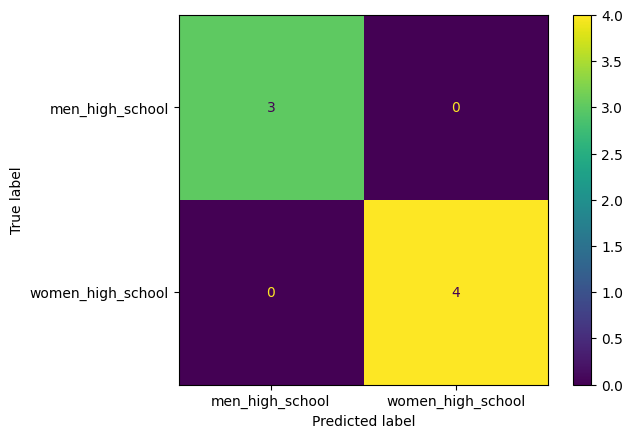

In [110]:
# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(
    confusion_matrix = matriz_confusao
    , display_labels=['men_high_school','women_high_school'])

disp.plot(values_format='d')

In [111]:
accuracy_score(y_true = y_test, y_pred = y_predicoes)

0.9

In [121]:
precision_score(y_true = y_test,
         y_pred = y_predicoes,
         pos_label=["women_high_school"],
         average='micro')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to ['women_high_school']) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


0.9

In [122]:
recall_score(y_true = y_test,
         y_pred = y_predicoes,
         pos_label=["women_high_school"],
         average='micro')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to ['women_high_school']) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


0.9

In [123]:
f1_score(y_true = y_test,
         y_pred = y_predicoes,
         pos_label=["women_high_school"],
         average='micro')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to ['women_high_school']) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


0.9

In [124]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

              precision    recall  f1-score   support

          22       1.00      1.00      1.00         4
          23       1.00      1.00      1.00         3
          24       1.00      1.00      1.00         1
          25       0.00      0.00      0.00         1
          26       0.50      1.00      0.67         1

    accuracy                           0.90        10
   macro avg       0.70      0.80      0.73        10
weighted avg       0.85      0.90      0.87        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Método 01 - Classificação com Regressão Logística:

In [220]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# dados de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# modelo de regressão logística
model = LogisticRegression()

# treino modelo
model.fit(x_train, y_train)

# previsões
y_pred = model.predict(x_test)

# Avalie a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

Acurácia: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Método 02 - Classificação com Random Forest:

In [225]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# dados de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# modelo Random Forest
model = RandomForestClassifier(n_estimators=100)

# treino do modelo
model.fit(x_train, y_train)

# previsões
y_pred = model.predict(x_test)

# precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

Acurácia: 1.0


<ipython-input-225-bcc95840930a>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


# Método 03 - Classificação com Support Vector Machine (SVM):

In [229]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# dados de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# modelo SVM
model = SVC(kernel='linear')

# treino do modelo
model.fit(x_train, y_train)

# previsões
y_pred = model.predict(x_test)

# precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

Acurácia: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Definir um modelo com base na análise realizada
- Eu escolho a Regressão Logística, pois é o método mais fácil e prático de realizar uma classificação de dados